In [1]:
import pandas as pd

#load data
data1 = pd.read_csv('/Users/lorenzo/Downloads/coin_Bitcoin.csv', parse_dates=['Date'])
data2 = pd.read_csv('/Users/lorenzo/Downloads/coin_Ethereum.csv', parse_dates=['Date'])
data3 = pd.read_csv('/Users/lorenzo/Downloads/coin_Solana.csv', parse_dates=['Date'])
data4 = pd.read_csv('/Users/lorenzo/Downloads/coin_EOS.csv', parse_dates=['Date'])
data5 = pd.read_csv('/Users/lorenzo/Downloads/coin_USDCoin.csv', parse_dates=['Date'])

In [2]:
#define a function
def select_time(data):
    data['Date'] = pd.to_datetime(data['Date'])
    filtered_data = data[data['Date'] >= '2020-01-01']
    filtered_data.set_index('Date', inplace=True)
    monthly_data = filtered_data.resample('M').mean()
    return monthly_data

#preprocess
monthly_data1 = select_time(data1)
monthly_data2 = select_time(data2)
monthly_data3 = select_time(data3)
monthly_data4 = select_time(data4)
monthly_data5 = select_time(data5)

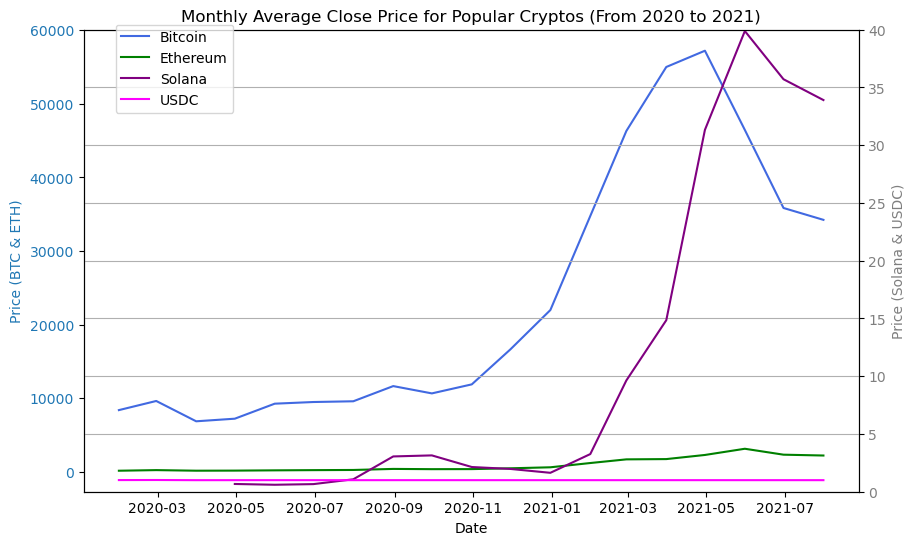

In [4]:
import matplotlib.pyplot as plt

#drawing
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Price (BTC & ETH)', color='tab:blue')
ax1.plot(monthly_data1.index, monthly_data1['Close'], label='Bitcoin',color='royalblue')
ax1.plot(monthly_data2.index, monthly_data2['Close'], label='Ethereum',color='green')
ax1.tick_params(axis='y', labelcolor='tab:blue')

#second Y axis
ax2 = ax1.twinx()  
ax2.set_ylabel('Price (Solana & USDC)', color='tab:gray')
ax2.plot(monthly_data3.index, monthly_data3['Close'], label='Solana',color='purple')
ax2.plot(monthly_data5.index, monthly_data5['Close'], label='USDC', color='magenta')
ax2.tick_params(axis='y', labelcolor='tab:gray')
ax2.set_ylim(0, 40)

fig.legend(loc="upper left", bbox_to_anchor=(0.15,0.9))
plt.title('Monthly Average Close Price for Popular Cryptos (From 2020 to 2021)')
plt.grid(True)
plt.show()

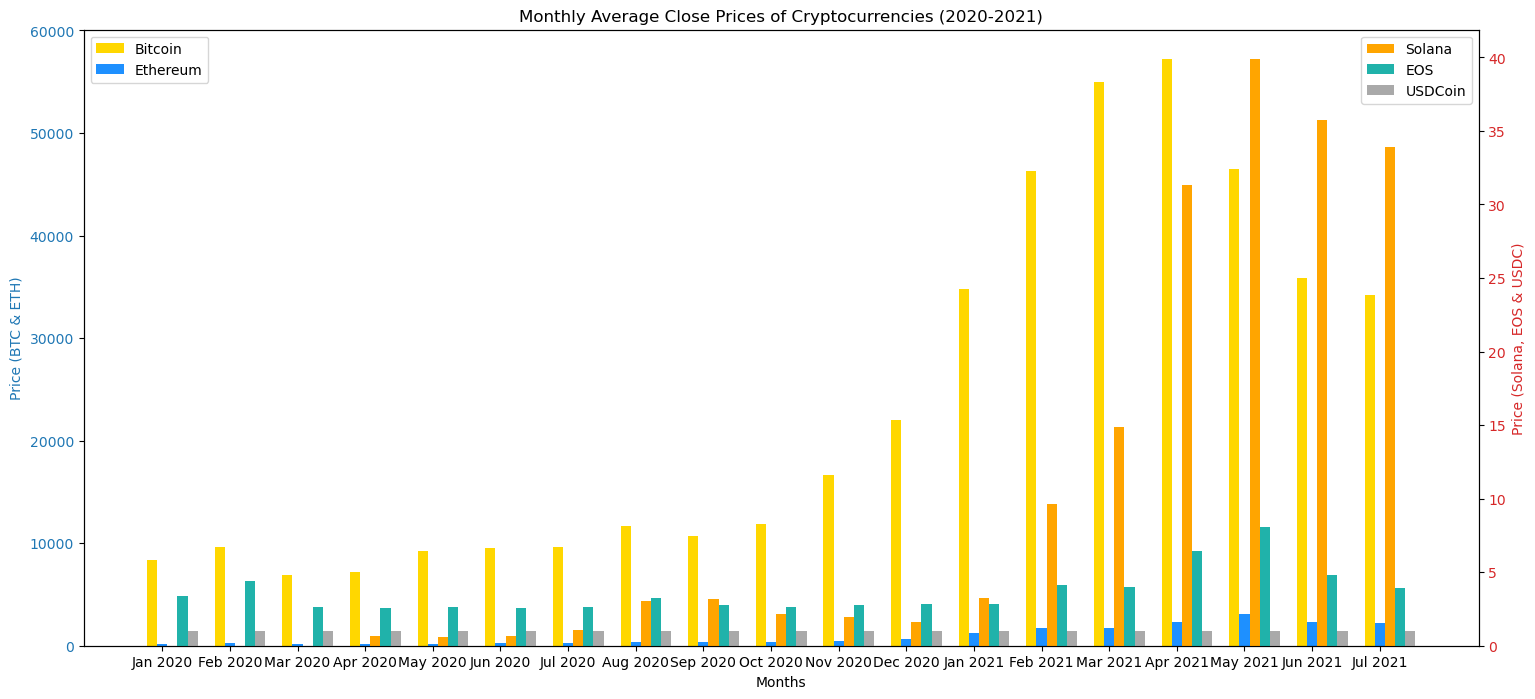

In [15]:
# Plotting
fig, ax1 = plt.subplots(figsize=(18, 8))

# Primary Y-axis for Bitcoin and Ethereum
ax1.set_xlabel('Months')
ax1.set_ylabel('Price (BTC & ETH)', color='tab:blue')
ax1.bar([x - width for x in positions], btc_prices_aligned, width, label='Bitcoin', color='#FFD700') # Gold for Bitcoin
ax1.bar(positions, eth_prices_aligned, width, label='Ethereum', color='#1E90FF') # Deep Blue for Ethereum
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks([r for r in range(len(all_months))])
ax1.set_xticklabels([month.strftime('%b %Y') for month in all_months])
ax1.legend(loc='upper left')

# Secondary Y-axis for Solana, EOS, and USDCoin
ax2 = ax1.twinx()
ax2.set_ylabel('Price (Solana, EOS & USDC)', color='tab:red')
ax2.bar([x + width for x in positions], sol_prices_aligned, width, label='Solana', color='#FFA500') # Vibrant Orange for Solana
ax2.bar([x + width*2 for x in positions], eos_prices_aligned, width, label='EOS', color='#20B2AA') # Teal for EOS
ax2.bar([x + width*3 for x in positions], usdc_prices_aligned, width, label='USDCoin', color='#A9A9A9') # Soft Grey for USDCoin
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

plt.title('Monthly Average Close Prices of Cryptocurrencies (2020-2021)')
plt.xticks(rotation=45)
plt.show()

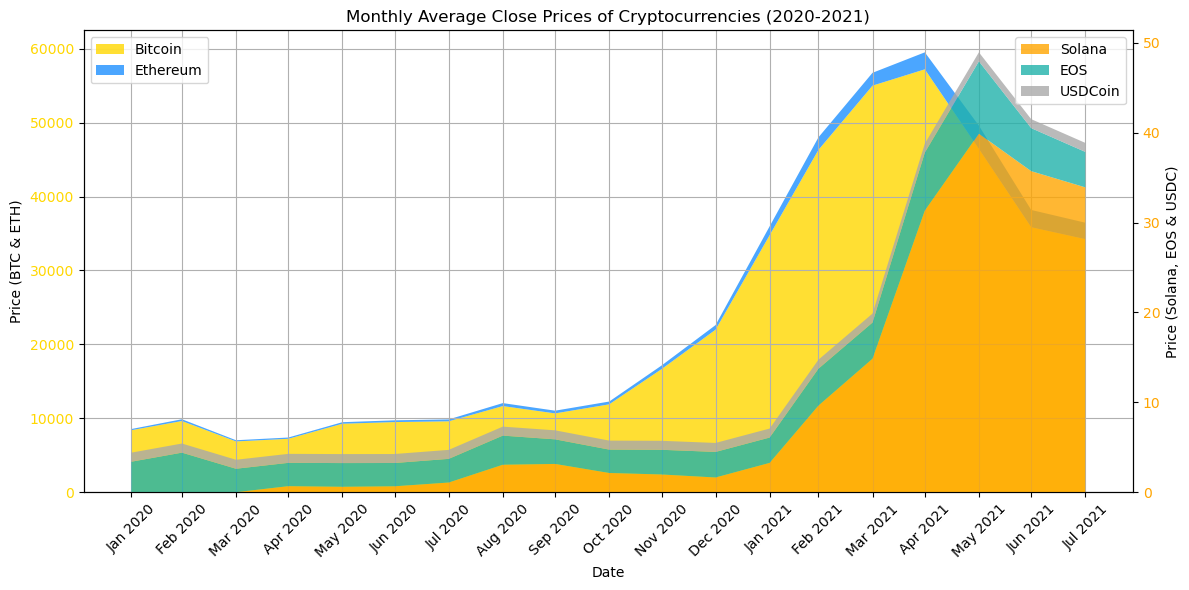

In [18]:
# Ensure all datasets have the same months
all_months = pd.date_range(start=monthly_data1.index.min(), end=monthly_data1.index.max(), freq='M')

# Function to align data
def align_data(data, all_months):
    aligned_data = data.reindex(all_months, fill_value=0)
    return aligned_data['Close']

# Aligning all datasets
btc_prices_aligned = align_data(monthly_data1, all_months)
eth_prices_aligned = align_data(monthly_data2, all_months)
sol_prices_aligned = align_data(monthly_data3, all_months)
eos_prices_aligned = align_data(monthly_data4, all_months)
usdc_prices_aligned = align_data(monthly_data5, all_months)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Stacked area chart for Bitcoin and Ethereum
ax1.stackplot(all_months, btc_prices_aligned, eth_prices_aligned, 
              labels=['Bitcoin', 'Ethereum'],
              colors=['#FFD700', '#1E90FF'], alpha=0.8)
ax1.set_ylabel('Price (BTC & ETH)')
ax1.legend(loc='upper left')
ax1.tick_params(axis='y', labelcolor='#FFD700')

# Secondary y-axis for Solana, EOS, and USDCoin
ax2 = ax1.twinx()
ax2.stackplot(all_months, sol_prices_aligned, eos_prices_aligned, usdc_prices_aligned,
              labels=['Solana', 'EOS', 'USDCoin'],
              colors=['#FFA500', '#20B2AA', '#A9A9A9'], alpha=0.8)
ax2.set_ylabel('Price (Solana, EOS & USDC)')
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor='#FFA500')

# Common x-axis settings
ax1.set_xlabel('Date')
ax1.set_xticks(all_months)
ax1.set_xticklabels([date.strftime('%b %Y') for date in all_months], rotation=45)
ax1.set_title('Monthly Average Close Prices of Cryptocurrencies (2020-2021)')
ax1.grid(True)

plt.tight_layout()
plt.show()